In [1]:
#common libraries
import numpy as np
import pandas as pd
import os
#to make different plots
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
#to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
#reading the file
training=pd.read_csv('C:\\Users\\Shravya\\Downloads\\bad buy prediction\\training.csv')
test=pd.read_csv('C:\\Users\\Shravya\\Downloads\\bad buy prediction\\test.csv')

In [3]:
#checking no of rows and columns using shape
training.shape

(72983, 34)

In [4]:
#first 5rows and columns
training.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [5]:
#checking the statistics of numerical features
training.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
RefId,72983.0,36511.428497,21077.241302,1.0,18257.5,36514.0,54764.5,73014.0
IsBadBuy,72983.0,0.122988,0.328425,0.0,0.0,0.0,0.0,1.0
VehYear,72983.0,2005.343052,1.731252,2001.0,2004.0,2005.0,2007.0,2010.0
VehicleAge,72983.0,4.176644,1.712210,0.0,3.0,4.0,5.0,9.0
WheelTypeID,69814.0,1.494299,0.521290,0.0,1.0,1.0,2.0,3.0
VehOdo,72983.0,71499.995917,14578.913128,4825.0,61837.0,73361.0,82436.0,115717.0
MMRAcquisitionAuctionAveragePrice,72965.0,6128.909217,2461.992768,0.0,4273.0,6097.0,7765.0,35722.0
MMRAcquisitionAuctionCleanPrice,72965.0,7373.636031,2722.491986,0.0,5406.0,7303.0,9021.0,36859.0
MMRAcquisitionRetailAveragePrice,72965.0,8497.034332,3156.285284,0.0,6280.0,8444.0,10651.0,39080.0
MMRAcquisitonRetailCleanPrice,72965.0,9850.928240,3385.789541,0.0,7493.0,9789.0,12088.0,41482.0


In [6]:
#total info regarding data type & null count 
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [7]:
training.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [8]:
test.isnull().sum()

RefId                                    0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1550
SubModel                                 5
Color                                    4
Transmission                             3
WheelTypeID                           2188
WheelType                             2188
VehOdo                                   0
Nationality                              7
Size                                     7
TopThreeAmericanName                     7
MMRAcquisitionAuctionAveragePrice       10
MMRAcquisitionAuctionCleanPrice         10
MMRAcquisitionRetailAveragePrice        10
MMRAcquisitonRetailCleanPrice           10
MMRCurrentAuctionAveragePrice          143
MMRCurrentAuctionCleanPrice            143
MMRCurrentR

In [9]:
#PurchDate(date of purchase) is not helpful in predicting if the car was good or bad buy.
#RefId(Id number when car purchased)is also not useful for prediction.
#BYRNO(unique number when car purchased) which would be not useful. So dropping those columns


In [10]:
training.drop(columns=['PurchDate','RefId','BYRNO'],inplace=True)


In [11]:
test.drop(columns=['PurchDate','RefId','BYRNO'],inplace=True)

In [12]:
# from the above PRIMEUNIT,AUCGUART columns are having most of the missing values i.e 95%.
#PRIMEUNIT	Identifies if the vehicle would have a higher demand than a standard purchase
#AUCGUART	The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)
# there is no preference of missing values from good/bad buy.so, dropping these columns

In [13]:
training.drop(columns=['PRIMEUNIT','AUCGUART'],inplace=True)

In [14]:
test.drop(columns=['PRIMEUNIT','AUCGUART'],inplace=True)

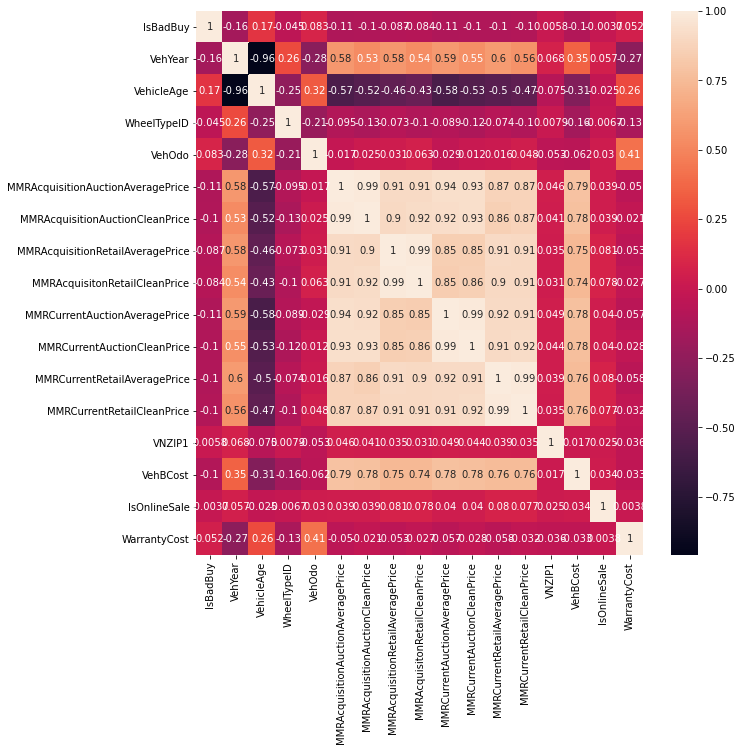

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(training.corr(),annot=True)
plt.show()

In [16]:
training.drop(columns=['VNZIP1','WheelTypeID'],inplace=True)

In [17]:
test.drop(columns=['VNZIP1','WheelTypeID'],inplace=True)

In [18]:
#correaltion is a technique where we can remove unnecessary columns from our dataset that dont have relation with target.
#from the above heat map we can see that VNZIP1,WheelTypeId are not correlated to target variable IsBadBuy. So We can remove those columns.

In [19]:
training.drop(columns=['Trim','WheelType','SubModel','Color','TopThreeAmericanName'],inplace=True)

In [20]:
test.drop(columns=['Trim','WheelType','SubModel','Color','TopThreeAmericanName'],inplace=True)

In [21]:
#trim, WheelType also not useful in prediction.
#submodel is not providing any information realted to good/bad
#color doesnot effect the car quality
#we dont need TopThreeAmericanNames as we already have make & nationality.
#so dropping these columns to build my model accurately. 

In [22]:
#checking null values
training.isna().sum()/len(training)

IsBadBuy                             0.000000
Auction                              0.000000
VehYear                              0.000000
VehicleAge                           0.000000
Make                                 0.000000
Model                                0.000000
Transmission                         0.000123
VehOdo                               0.000000
Nationality                          0.000069
Size                                 0.000069
MMRAcquisitionAuctionAveragePrice    0.000247
MMRAcquisitionAuctionCleanPrice      0.000247
MMRAcquisitionRetailAveragePrice     0.000247
MMRAcquisitonRetailCleanPrice        0.000247
MMRCurrentAuctionAveragePrice        0.004316
MMRCurrentAuctionCleanPrice          0.004316
MMRCurrentRetailAveragePrice         0.004316
MMRCurrentRetailCleanPrice           0.004316
VNST                                 0.000000
VehBCost                             0.000000
IsOnlineSale                         0.000000
WarrantyCost                      

In [23]:
test.isna().sum()/len(training)

Auction                              0.000000
VehYear                              0.000000
VehicleAge                           0.000000
Make                                 0.000000
Model                                0.000000
Transmission                         0.000041
VehOdo                               0.000000
Nationality                          0.000096
Size                                 0.000096
MMRAcquisitionAuctionAveragePrice    0.000137
MMRAcquisitionAuctionCleanPrice      0.000137
MMRAcquisitionRetailAveragePrice     0.000137
MMRAcquisitonRetailCleanPrice        0.000137
MMRCurrentAuctionAveragePrice        0.001959
MMRCurrentAuctionCleanPrice          0.001959
MMRCurrentRetailAveragePrice         0.001959
MMRCurrentRetailCleanPrice           0.001959
VNST                                 0.000000
VehBCost                             0.000000
IsOnlineSale                         0.000000
WarrantyCost                         0.000000
dtype: float64

In [24]:
training.shape

(72983, 22)

In [25]:
#having small fraction of missing values. so removing them
training.dropna(inplace=True)

In [26]:
training.shape

(72658, 22)

In [27]:
training.isnull().sum()

IsBadBuy                             0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Transmission                         0
VehOdo                               0
Nationality                          0
Size                                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VNST                                 0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [28]:
#there are no missing values now in the data set.

In [29]:
test.dropna(inplace=True)

In [30]:
training.shape

(72658, 22)

In [31]:
test.isnull().sum()

Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Transmission                         0
VehOdo                               0
Nationality                          0
Size                                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VNST                                 0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [32]:
#dividing numerical and categorical columns
numerical_features=training.select_dtypes(exclude='object')
categorical_features=training.select_dtypes(include='object')

In [33]:
print(f"Number of Categorical_features: {categorical_features.shape[1]}")
print(f"Number of numerical_features: {numerical_features.shape[1]}")

Number of Categorical_features: 7
Number of numerical_features: 15


In [34]:
numerical_features

,IsBadBuy,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
0,0,2006,3,89046,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,7100.0,0,1113
1,0,2004,5,93593,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,7600.0,0,1053
2,0,2005,4,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389
3,0,2004,5,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630
4,0,2005,4,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,2001,8,45234,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,4200.0,0,993
72979,0,2007,2,71759,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,6200.0,0,1038
72980,0,2005,4,88500,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,8200.0,0,1893
72981,0,2006,3,79554,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,7000.0,0,1974


In [35]:
categorical_features

,Auction,Make,Model,Transmission,Nationality,Size,VNST
0,ADESA,MAZDA,MAZDA3,AUTO,OTHER ASIAN,MEDIUM,FL
1,ADESA,DODGE,1500 RAM PICKUP 2WD,AUTO,AMERICAN,LARGE TRUCK,FL
2,ADESA,DODGE,STRATUS V6,AUTO,AMERICAN,MEDIUM,FL
3,ADESA,DODGE,NEON,AUTO,AMERICAN,COMPACT,FL
4,ADESA,FORD,FOCUS,MANUAL,AMERICAN,COMPACT,FL
...,...,...,...,...,...,...,...
72978,ADESA,MERCURY,SABLE,AUTO,AMERICAN,MEDIUM,GA
72979,ADESA,CHEVROLET,MALIBU 4C,AUTO,AMERICAN,MEDIUM,GA
72980,ADESA,JEEP,GRAND CHEROKEE 2WD V,AUTO,AMERICAN,MEDIUM SUV,GA
72981,ADESA,CHEVROLET,IMPALA,AUTO,AMERICAN,LARGE,GA


0    0.876917
1    0.123083
Name: IsBadBuy, dtype: float64


<AxesSubplot:ylabel='IsBadBuy'>

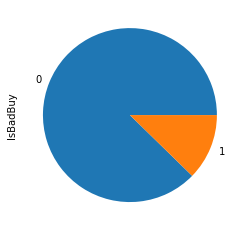

In [36]:
percbuy=training['IsBadBuy'].value_counts()/len(training)
print(percbuy)
percbuy.plot(kind='pie')

In [37]:
#The badbuy is 12.29%. The target is highly skewed.I think there is base line accuracy of 83%. So f-score must be used as evaluation metrics.

<AxesSubplot:xlabel='VehYear', ylabel='count'>

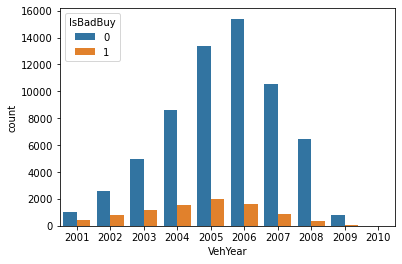

In [38]:
sns.countplot(x='VehYear',data=training,hue='IsBadBuy')

In [39]:
# As the number of buys increased there increased in number of bad buys.

<AxesSubplot:xlabel='VehicleAge', ylabel='count'>

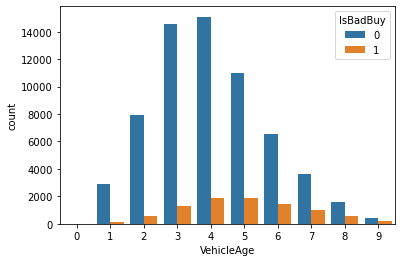

In [40]:
sns.countplot(x='VehicleAge',data=training,hue='IsBadBuy')

In [41]:
#As the vehicle age increases bad buy percentage also increasing.

<AxesSubplot:xlabel='IsBadBuy', ylabel='VehOdo'>

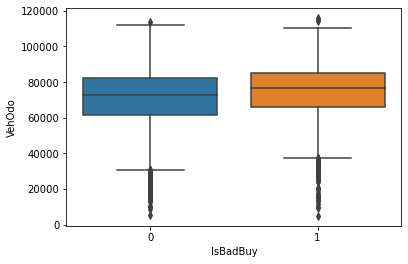

In [42]:
sns.boxplot(y='VehOdo',x='IsBadBuy', data = training)

<AxesSubplot:xlabel='VehicleAge', ylabel='VehOdo'>

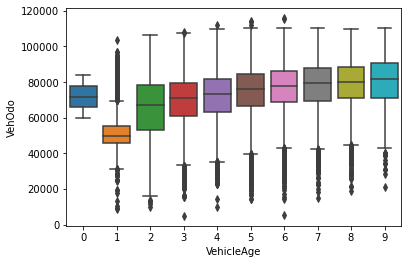

In [43]:
#VehicleAge	The Years elapsed since the manufacturer year
#VehOdo	The vehicles odometer reading
sns.boxplot(x='VehicleAge',y='VehOdo',data=training)

In [44]:
# In the above graph it shows that VehOdo is stable at 7k-9k.

(array([14381.,     0.,     0.,     0.,     0., 17396.,     0.,     0.,
            0., 40881.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

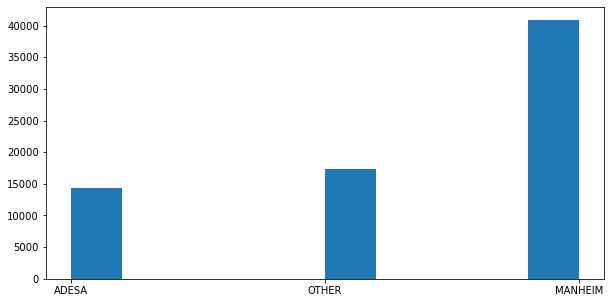

In [45]:
plt.figure(figsize = (10,5))
plt.hist(training['Auction'],bins=10)

<AxesSubplot:xlabel='Nationality', ylabel='count'>

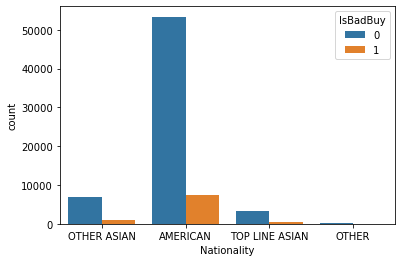

In [46]:
sns.countplot(x='Nationality',data=training,hue='IsBadBuy')

In [47]:
training.groupby('IsBadBuy')[['MMRAcquisitionAuctionAveragePrice','VehBCost','WarrantyCost']].median()

,MMRAcquisitionAuctionAveragePrice,VehBCost,WarrantyCost
IsBadBuy,,,
0,6240.0,6800.0,1155.0
1,5006.0,6000.0,1243.0


<AxesSubplot:xlabel='IsBadBuy', ylabel='WarrantyCost'>

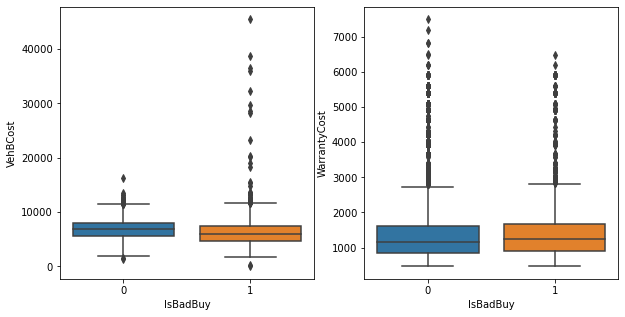

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(y='VehBCost',x='IsBadBuy', data=training)
plt.subplot(122)
sns.boxplot(y='WarrantyCost',x='IsBadBuy', data=training)

In [49]:
# numerical data correaltion

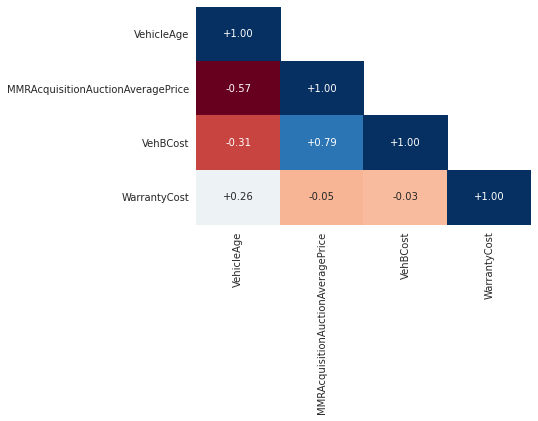

In [50]:
p = training[['VehicleAge','MMRAcquisitionAuctionAveragePrice','VehBCost','WarrantyCost']].copy()

# plot correlation matrix
corr = p.corr()
mask = np.zeros_like(corr)  # create a mask so we only see the correlation values once
mask[np.triu_indices_from(mask, 1)] = True
# plot the heatmap
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', fmt='+.2f', cbar=False)

In [51]:
categorical_features

,Auction,Make,Model,Transmission,Nationality,Size,VNST
0,ADESA,MAZDA,MAZDA3,AUTO,OTHER ASIAN,MEDIUM,FL
1,ADESA,DODGE,1500 RAM PICKUP 2WD,AUTO,AMERICAN,LARGE TRUCK,FL
2,ADESA,DODGE,STRATUS V6,AUTO,AMERICAN,MEDIUM,FL
3,ADESA,DODGE,NEON,AUTO,AMERICAN,COMPACT,FL
4,ADESA,FORD,FOCUS,MANUAL,AMERICAN,COMPACT,FL
...,...,...,...,...,...,...,...
72978,ADESA,MERCURY,SABLE,AUTO,AMERICAN,MEDIUM,GA
72979,ADESA,CHEVROLET,MALIBU 4C,AUTO,AMERICAN,MEDIUM,GA
72980,ADESA,JEEP,GRAND CHEROKEE 2WD V,AUTO,AMERICAN,MEDIUM SUV,GA
72981,ADESA,CHEVROLET,IMPALA,AUTO,AMERICAN,LARGE,GA


In [52]:
categorical_features.nunique()

Auction            3
Make              33
Model           1060
Transmission       3
Nationality        4
Size              12
VNST              37
dtype: int64

In [53]:
categorical_features.Auction.nunique()

3

In [54]:
categorical_features.Auction.unique()

array(['ADESA', 'OTHER', 'MANHEIM'], dtype=object)

In [55]:
categorical_features.Make.nunique()

33

In [56]:
categorical_features.Make.unique()

array(['MAZDA', 'DODGE', 'FORD', 'MITSUBISHI', 'KIA', 'GMC', 'NISSAN',
       'CHEVROLET', 'SATURN', 'CHRYSLER', 'MERCURY', 'HYUNDAI', 'TOYOTA',
       'PONTIAC', 'SUZUKI', 'JEEP', 'HONDA', 'OLDSMOBILE', 'BUICK',
       'SCION', 'VOLKSWAGEN', 'ISUZU', 'LINCOLN', 'MINI', 'SUBARU',
       'CADILLAC', 'VOLVO', 'INFINITI', 'PLYMOUTH', 'LEXUS', 'ACURA',
       'TOYOTA SCION', 'HUMMER'], dtype=object)

In [57]:
categorical_features.Model.nunique()

1060

In [58]:
categorical_features.Model.unique()

array(['MAZDA3', '1500 RAM PICKUP 2WD', 'STRATUS V6', ...,
       'ALTIMA 3.5L V6 MPI /', 'EXCURSION 4WD V8 5.4',
       'M45 4.5L V8 MPI / SF'], dtype=object)

In [59]:
categorical_features.Transmission.nunique()

3

In [60]:
categorical_features.Transmission.unique()

array(['AUTO', 'MANUAL', 'Manual'], dtype=object)

In [61]:
training.Transmission.replace(to_replace='Manual',value='MANUAL',inplace=True)

In [62]:
training.Transmission.unique()

array(['AUTO', 'MANUAL'], dtype=object)

In [63]:
categorical_features.Nationality.nunique()

4

In [64]:
categorical_features.Nationality.unique()

array(['OTHER ASIAN', 'AMERICAN', 'TOP LINE ASIAN', 'OTHER'], dtype=object)

In [65]:
training.Nationality.replace(to_replace=['OTHER ASIAN','TOP LINE ASIAN'],value='ASIAN',inplace=True)

In [66]:
training.Nationality.unique()

array(['ASIAN', 'AMERICAN', 'OTHER'], dtype=object)

In [67]:
categorical_features.Size.unique()

array(['MEDIUM', 'LARGE TRUCK', 'COMPACT', 'LARGE', 'VAN', 'MEDIUM SUV',
       'LARGE SUV', 'SPECIALTY', 'SPORTS', 'CROSSOVER', 'SMALL SUV',
       'SMALL TRUCK'], dtype=object)

In [68]:
categorical_features.VNST.unique()

array(['FL', 'VA', 'IA', 'AR', 'MN', 'TN', 'PA', 'OH', 'AL', 'MI', 'TX',
       'IL', 'MA', 'AZ', 'GA', 'NC', 'MD', 'CA', 'UT', 'OR', 'SC', 'CO',
       'ID', 'NV', 'WV', 'MS', 'OK', 'NM', 'LA', 'IN', 'MO', 'WA', 'NH',
       'NJ', 'NY', 'NE', 'KY'], dtype=object)

In [69]:
## categorical data features are modified. Now data is clean. so that we can split data for model building.

In [70]:

y = training["IsBadBuy"]
X = training.drop("IsBadBuy",axis=1)

In [71]:
X

,Auction,VehYear,VehicleAge,Make,Model,Transmission,VehOdo,Nationality,Size,MMRAcquisitionAuctionAveragePrice,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,ADESA,2006,3,MAZDA,MAZDA3,AUTO,89046,ASIAN,MEDIUM,8155.0,...,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,FL,7100.0,0,1113
1,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,AUTO,93593,AMERICAN,LARGE TRUCK,6854.0,...,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,FL,7600.0,0,1053
2,ADESA,2005,4,DODGE,STRATUS V6,AUTO,73807,AMERICAN,MEDIUM,3202.0,...,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,FL,4900.0,0,1389
3,ADESA,2004,5,DODGE,NEON,AUTO,65617,AMERICAN,COMPACT,1893.0,...,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,FL,4100.0,0,630
4,ADESA,2005,4,FORD,FOCUS,MANUAL,69367,AMERICAN,COMPACT,3913.0,...,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,ADESA,2001,8,MERCURY,SABLE,AUTO,45234,AMERICAN,MEDIUM,1996.0,...,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,GA,4200.0,0,993
72979,ADESA,2007,2,CHEVROLET,MALIBU 4C,AUTO,71759,AMERICAN,MEDIUM,6418.0,...,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,GA,6200.0,0,1038
72980,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,AUTO,88500,AMERICAN,MEDIUM SUV,8545.0,...,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,GA,8200.0,0,1893
72981,ADESA,2006,3,CHEVROLET,IMPALA,AUTO,79554,AMERICAN,LARGE,6420.0,...,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,GA,7000.0,0,1974


In [72]:
y

0        0
1        0
2        0
3        0
4        0
        ..
72978    1
72979    0
72980    0
72981    0
72982    0
Name: IsBadBuy, Length: 72658, dtype: int64

In [73]:
##changing categorical and numerical feataures into a list format. so that we can standardise the numerical columns and do one hot encoding for categorical columns.

In [74]:
categorical_list =list(X.select_dtypes(include=['object']).columns)

In [75]:
categorical_list

['Auction', 'Make', 'Model', 'Transmission', 'Nationality', 'Size', 'VNST']

In [76]:
numerical_list = list(X.select_dtypes(exclude=['object']).columns)

In [77]:
numerical_list

['VehYear',
 'VehicleAge',
 'VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost']

In [78]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics

In [79]:
#column transformer is used to preprocess the categorical and numerical features. This transformer allows us to make changes in columns.
#standardisation is important in every machine learning model building.this will make mean=0 and std=1 and  looks like standard normall distribution.
#One hot encoding is used for categorical features to create a binary column for each category  and returns a matrix.so that the machine can easily understand.

In [80]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(X[categorical_list])
encoded_cols=list(encoder.get_feature_names(categorical_list))
X[encoded_cols]=encoder.transform(X[categorical_list]);
test[encoded_cols]=encoder.transform(test[categorical_list]);

C:\Users\shravya\anaconda3\lib\site-packages\pandas\core\frame.py:3673: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
C:\Users\shravya\anaconda3\lib\site-packages\pandas\core\frame.py:3673: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X[numerical_list]);
X[numerical_list]=scaler.transform(X[numerical_list])
test[numerical_list]=scaler.transform(test[numerical_list])

In [82]:
X=X[numerical_list+encoded_cols]
test=test[numerical_list+encoded_cols]

In [83]:
#splitting the data into training and validation sets.

In [84]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## decision tree classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
model_dt=DecisionTreeClassifier(max_depth=12,random_state=42)
model_dt.fit(X,y)
print("Train_acc:",model_dt.score(X,y)," | Val_acc:",model_dt.score(x_val,y_val))

Train_acc: 0.8896886784662391  | Val_acc: 0.8908615469309111


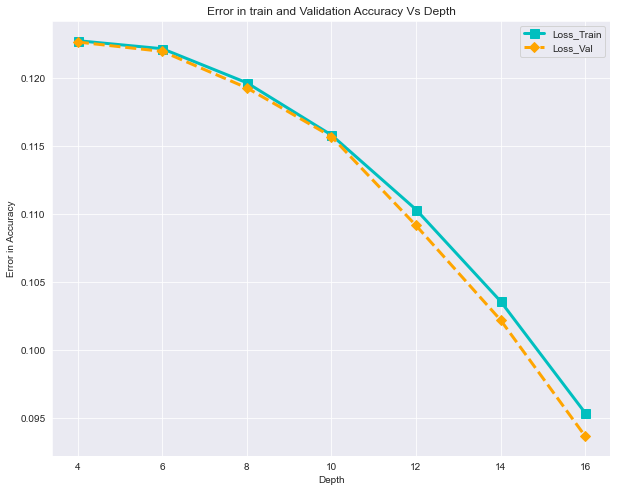

In [86]:
def max_depth(min,max):
    depth=[]
    tr_ac=[]
    va_ac=[]
    for i in range(min,max,2):
        model_dt =DecisionTreeClassifier(max_depth=i, random_state=42)
        model_dt.fit(X,y)
        depth.append(i)
        tr_ac.append(model_dt.score(X,y))
        va_ac.append(model_dt.score(x_val,y_val))
        
    tr_ac=1-np.array(tr_ac);
    va_ac=1-np.array(va_ac);
    
    plt.figure(figsize=(10,8))
    sns.set_style('darkgrid')
    plt.title('Error in train and Validation Accuracy Vs Depth')
    plt.xlabel('Depth')
    plt.ylabel('Error in Accuracy')
    plt.plot(depth,tr_ac,'cs-',linewidth=3,markersize=9)
    plt.plot(depth,va_ac,'D--',color='orange',linewidth=3, markersize=7)
    plt.legend(['Loss_Train','Loss_Val']);
    plt.show()
max_depth(4,18)


In [87]:
model_dt=DecisionTreeClassifier(max_depth=6,random_state=42,max_features=0.9,class_weight={0:1,1:2})
model_dt.fit(X,y)
print("Train_acc:",model_dt.score(X,y)," | Val_acc:",model_dt.score(x_val,y_val))

Train_acc: 0.8755677282611688  | Val_acc: 0.8747591522157996


In [88]:
#test data
df_pred = pd.DataFrame(model_dt.predict_proba(test))


In [89]:
preds=model_dt.predict(test)
df_pred['IsBadBuy']=preds

In [90]:
df_pred

,0,1,IsBadBuy
0,0.842197,0.157803,0
1,0.842197,0.157803,0
2,0.842135,0.157865,0
3,0.524638,0.475362,0
4,0.794007,0.205993,0
...,...,...,...
48556,0.731714,0.268286,0
48557,0.881281,0.118719,0
48558,0.842197,0.157803,0
48559,0.731714,0.268286,0


## random forest  classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier    
model_rf=RandomForestClassifier(n_jobs=-1,n_estimators=12,max_depth=16,random_state=42)
model_rf.fit(X,y)
print("Train_acc:",model_rf.score(X,y)," | Val_acc:",model_rf.score(x_val,y_val))

Train_acc: 0.8776046684466955  | Val_acc: 0.8777181392788329


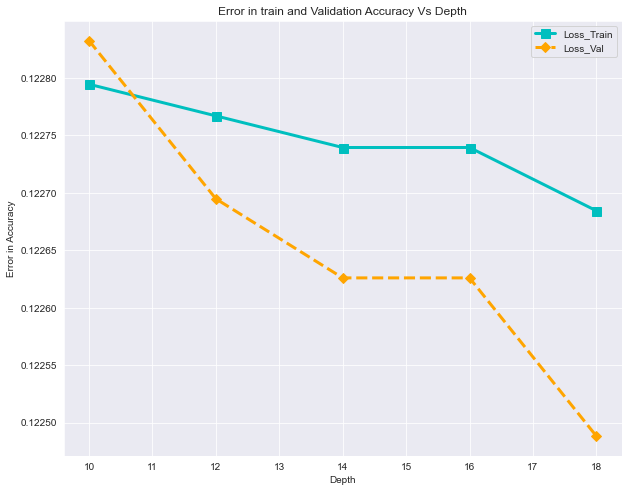

In [92]:
def max_depth(min,max):
    depth=[]
    tr_ac=[]
    va_ac=[]
    for i in range(min,max,2):
        model_rf =RandomForestClassifier(max_depth=i, random_state=42)
        model_rf.fit(X,y)
        depth.append(i)
        tr_ac.append(model_rf.score(X,y))
        va_ac.append(model_rf.score(x_val,y_val))
        
    tr_ac=1-np.array(tr_ac);
    va_ac=1-np.array(va_ac);
    
    plt.figure(figsize=(10,8))
    sns.set_style('darkgrid')
    plt.title('Error in train and Validation Accuracy Vs Depth')
    plt.xlabel('Depth')
    plt.ylabel('Error in Accuracy')
    plt.plot(depth,tr_ac,'cs-',linewidth=3,markersize=9)
    plt.plot(depth,va_ac,'D--',color='orange',linewidth=3, markersize=7)
    plt.legend(['Loss_Train','Loss_Val']);
    plt.show()
max_depth(10,20)

In [93]:
def test_model(**params):
        model_rf=RandomForestClassifier(n_jobs=-1,random_state=42,**params)
        model_rf.fit(X,y)
        print(" | Train_acc: ",model_rf.score(X,y)," | Val_acc: ",model_rf.score(x_val,y_val) ) 
        return model_rf.score(X,y),model_rf.score(x_val,y_val)


In [94]:
test_model(n_estimators=12)
test_model(n_estimators=100)

 | Train_acc:  0.9851771312174846  | Val_acc:  0.9853426919900908
 | Train_acc:  1.0  | Val_acc:  1.0


(1.0, 1.0)

In [95]:
model_rf=RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=16,random_state=42)
model_rf.fit(X,y)
print("Train_acc:",model_rf.score(X,y)," | Val_acc:",model_rf.score(x_val,y_val))

Train_acc: 0.8772605907126538  | Val_acc: 0.8773740710156895


In [96]:
#test data
df_pred = pd.DataFrame(model_rf.predict_proba(test))

In [97]:
pred=model_rf.predict(test)
df_pred['IsBadBuy']=pred


In [98]:
df_pred

,0,1,IsBadBuy
0,0.886603,0.113397,0
1,0.893993,0.106007,0
2,0.911515,0.088485,0
3,0.744641,0.255359,0
4,0.865741,0.134259,0
...,...,...,...
48556,0.882239,0.117761,0
48557,0.919483,0.080517,0
48558,0.892500,0.107500,0
48559,0.879639,0.120361,0


## logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel_fit=logmodel.fit(X,y)
print("Train_acc:",logmodel.score(X,y)," | Val_acc:",logmodel.score(x_val,y_val))

C:\Users\shravya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train_acc: 0.8769165129786122  | Val_acc: 0.8773052573630609


In [100]:
#test data
df_pred = pd.DataFrame(logmodel.predict_proba(test))

In [101]:
pred_test=logmodel.predict(test)
df_pred['IsBadBuy']=pred_test


In [102]:
df_pred

,0,1,IsBadBuy
0,0.904041,0.095959,0
1,0.933947,0.066053,0
2,0.950817,0.049183,0
3,0.729914,0.270086,0
4,0.822212,0.177788,0
...,...,...,...
48556,0.926364,0.073636,0
48557,0.921947,0.078053,0
48558,0.888996,0.111004,0
48559,0.902063,0.097937,0
